# use another position
- initial_state2, 2nd last is flipped
- has 2 circuits instead of 3 circuits.  11/16/2022

In [1]:
# !pip install pennylane
# !pip install pennylane-qiskit

In [2]:
# !pip install pennylane-lightning

In [3]:
# !pip install pennylane-lightning[gpu]  # has erro

In [4]:
import numpy as np
from pennylane.optimize import AdamOptimizer
from pennylane import numpy as qml_np
import pennylane as qml

import math
import matplotlib.pyplot as plt
import datetime

# 2nd last flipped

In [5]:
num_of_qubits = 1+3
N = 2**(num_of_qubits-2)


initial_state2 = [1/math.sqrt(N)]*(N-2) + [0, 1/math.sqrt(N)] + [0]*(N-2) + [1/math.sqrt(N), 0] # 2**(num_qubits-1)
initial_state_phi1 = initial_state2
print(f'initial_state_phi1={initial_state_phi1}')
initial_state_0_phi1  = initial_state_phi1 + [0]*len(initial_state_phi1) # 2**num_of_qubits




initial_state_phi1=[0.5, 0.5, 0, 0.5, 0, 0, 0.5, 0]


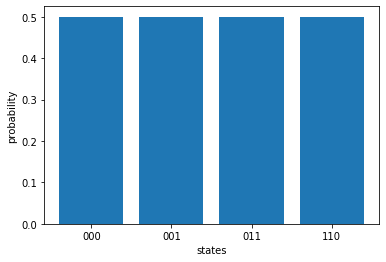

In [6]:
x=[]
y=[]
results = initial_state_0_phi1
for i in range(len(results)):
    if(np.linalg.norm(results[i])>0.01):
         x.append(np.binary_repr(i,3))
         y.append(results[i])
plt.bar(x,y);
plt.xlabel('states');
plt.ylabel('probability');
# plt.xticks(rotation=90);
plt.show()

In [7]:
## three quantum circuits
def layer_with_HT(theta):
    for i in range(num_of_qubits-1):
        qml.CRY(theta[i], wires=(0,i+1))
    for i in range(num_of_qubits-2):
        qml.Toffoli(wires=(0,i+1,i+2))

        
def layer_no_HT(theta, qubit_posi):
    for i in range(num_of_qubits-1):
        qml.RY(theta[i], wires=(qubit_posi[i]))
    for i in range(num_of_qubits-2):
        qml.CNOT(wires=(qubit_posi[i],qubit_posi[i+1]))


In [8]:
device_name = 'default.qubit'  #'default.qubit' # 
device_name2 = 'default.qubit' # has qml.state()

In [9]:

        
# dev_with_HT=qml.device(device_name2, wires=num_of_qubits+1) #AerDevice(wires=num_of_qubits, shots=20000, backend='qasm_simulator')
dev_with_HT=qml.device(device_name, wires=num_of_qubits)
@qml.qnode(dev_with_HT)
def quantum_circuit_with_HT(theta):
    # initiate state vector |phi_1>
    qml.QubitStateVector(np.array(initial_state_0_phi1), wires=range(num_of_qubits))
    qml.Hadamard(0)
    for theta_i in theta:
        layer_with_HT(theta_i)
    qml.Hadamard(0)    
    return qml.expval(qml.PauliZ(0)) 

print(qml.draw(quantum_circuit_with_HT)([[0.1]*(num_of_qubits-1)]))





0: ─╭QubitStateVector(M0)──H─╭●────────╭●────────╭●────────╭●─╭●──H─┤  <Z>
1: ─├QubitStateVector(M0)────╰RY(0.10)─│─────────│─────────├●─│─────┤     
2: ─├QubitStateVector(M0)──────────────╰RY(0.10)─│─────────╰X─├●────┤     
3: ─╰QubitStateVector(M0)────────────────────────╰RY(0.10)────╰X────┤     


In [10]:

# dev_with_HTZ=qml.device(device_name2, wires=num_of_qubits+1) #AerDevice(wires=num_of_qubits, shots=20000, backend='qasm_simulator')
dev_with_HTZ=qml.device(device_name, wires=num_of_qubits)
@qml.qnode(dev_with_HTZ)
def quantum_circuit_with_HTZ(theta):
    # initiate state vector |phi_1>
    qml.QubitStateVector(np.array(initial_state_0_phi1), wires=range(num_of_qubits))
    qml.Hadamard(0)
    for theta_i in theta:
        layer_with_HT(theta_i)
    qml.CZ([0,1])
    qml.Hadamard(0)    
    return qml.expval(qml.PauliZ(0)) 

print('newly added')
print(qml.draw(quantum_circuit_with_HTZ)([[0.1]*(num_of_qubits-1)]))



# dev_no_HT_Z=qml.device(device_name2, wires=num_of_qubits+1) #AerDevice(wires=num_of_qubits-1, shots=20000, backend='qasm_simulator')
dev_no_HT_Z=qml.device(device_name, wires=num_of_qubits-1)        
@qml.qnode(dev_no_HT_Z)
def quantum_circuit_no_HT_return_Z(theta):
    # initiate state vector |phi_1>
    qml.QubitStateVector(np.array(initial_state_phi1), wires=range(num_of_qubits-1))
    for theta_i in theta:
        layer_no_HT(theta_i, list(range(num_of_qubits-1)))
    
    return qml.expval(qml.PauliZ(0))  
    # return qml.sample(qml.PauliZ(0)) 
print('newly added 2')   
print(qml.draw(quantum_circuit_no_HT_return_Z)([[0.2]*(num_of_qubits-1)]))



# dev_no_HT_S=qml.device(device_name2, wires=num_of_qubits+1) #AerDevice(wires=num_of_qubits-1, backend='qasm_simulator')
dev_no_HT_S=qml.device(device_name2, wires=num_of_qubits-1)  
@qml.qnode(dev_no_HT_S)
def quantum_circuit_no_HT_return_state(theta):
    # initiate state vector |phi_1>
    qml.QubitStateVector(np.array(initial_state_phi1), wires=range(num_of_qubits-1))
    for theta_i in theta:
        layer_no_HT(theta_i, list(range(num_of_qubits-1)))    
    return qml.state()

print('newly added 3')

newly added
0: ─╭QubitStateVector(M0)──H─╭●────────╭●────────╭●────────╭●─╭●─╭●──H─┤  <Z>
1: ─├QubitStateVector(M0)────╰RY(0.10)─│─────────│─────────├●─│──╰Z────┤     
2: ─├QubitStateVector(M0)──────────────╰RY(0.10)─│─────────╰X─├●───────┤     
3: ─╰QubitStateVector(M0)────────────────────────╰RY(0.10)────╰X───────┤     
newly added 2
0: ─╭QubitStateVector(M0)──RY(0.20)─╭●────┤  <Z>
1: ─├QubitStateVector(M0)──RY(0.20)─╰X─╭●─┤     
2: ─╰QubitStateVector(M0)──RY(0.20)────╰X─┤     
newly added 3


In [11]:
coef2 = 1
def objective_fn(theta):
    val1_1 = quantum_circuit_with_HT(theta)
    val1_2 = quantum_circuit_with_HTZ(theta)
#     val2 = quantum_circuit_no_HT_return_Z(theta)
#     return coef2*val2-0.5*(val1_1 - val1_2)
    return -0.5*(val1_1 - val1_2)

In [12]:
max_repeat = 1 #100
iter_max = 300  #300
num_of_layers = 3
prb_last_list = []
obj_list_rep = []
theta_list = []
debug_flag, print_flag = 0, True
start_time = datetime.datetime.now()


probs_last = []


for rep in range(1,max_repeat+1):
    if print_flag:
        print(f'\n\nrep={rep}')
    else:
        print(f'\n\nrep={rep}', end='  ')
    
    optimizer = AdamOptimizer(0.05, beta1=0.9, beta2=0.999)
    theta=qml_np.random.uniform(0, 2*math.pi, size=(num_of_layers, num_of_qubits-1), requires_grad=True)
    obj_list = []
    for iter in range(1, iter_max+1):    
        theta, obj = optimizer.step_and_cost(objective_fn, theta)
        val1_1 = quantum_circuit_with_HT(theta)
        val1_2 = quantum_circuit_with_HTZ(theta)
        val2 = quantum_circuit_no_HT_return_Z(theta)
        if (iter==1 or iter%100==0 or iter==iter_max) and print_flag:
            print(f'iter={iter:3d} :: obj={obj:12.8f} :: val1_1={val1_1:12.8f} \
                 :: val1_2={val1_2:12.8f} :: val2={val2:12.8f}  \
                 coef2*val2-0.5*(val1_1 - val1_2)={coef2*val2-0.5*(val1_1 - val1_2):12.8f}  \
                 :: theta={theta}')
            # print(f'iter={iter:3d} :: obj={obj:12.8f} :: theta={theta}')
        obj_list.append(obj)
    theta_list.append(theta)
    print(f'obj_list(last 3)={obj_list[-3:]}')
    obj_list_rep.append(obj_list)
    
    ## display the amplified state
    state = quantum_circuit_no_HT_return_state(theta)
    prb = [i.item()**2 for i in state]
    # print(f'state={state}')
    probs_last = prb
    if len(prb)>20:
        print(f'prb(last 2)={prb[-2:]}')
    else:
        print(f'prb={prb}')
    prb_last_list.append(prb[-1])
    
    
    
    
    
end_time = datetime.datetime.now()
duration = end_time - start_time
duration_in_s = duration.total_seconds()
print(f'time consumed: {duration_in_s}s')



rep=1
iter=  1 :: obj= -0.00564778 :: val1_1= -0.17488072                  :: val1_2= -0.24067689 :: val2=  0.78086845                   coef2*val2-0.5*(val1_1 - val1_2)=  0.74797037                   :: theta=[[3.45898974 3.94749308 4.92690986]
 [0.89476698 3.84427806 1.71175874]
 [2.97225556 4.98596763 4.00538554]]
iter=100 :: obj= -0.49994405 :: val1_1=  0.49763428                  :: val1_2= -0.50226657 :: val2= -0.99961228                   coef2*val2-0.5*(val1_1 - val1_2)= -1.49956270                   :: theta=[[3.95278672 5.2205889  3.52091223]
 [2.12240634 3.04647079 1.88363893]
 [1.76373911 5.42385823 3.52108464]]
iter=200 :: obj= -0.50000000 :: val1_1=  0.50002657                  :: val1_2= -0.49997343 :: val2= -0.99999999                   coef2*val2-0.5*(val1_1 - val1_2)= -1.49999999                   :: theta=[[3.92677951 5.21339747 3.52484236]
 [2.13021718 3.03252116 1.86963619]
 [1.78520485 5.42482324 3.53578136]]
iter=300 :: obj= -0.50000000 :: val1_1=  0.50000001  

In [13]:
print('time now: ', end_time)
print(np.linalg.norm(1j))

time now:  2023-03-16 07:00:30.744902
1.0


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:796: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


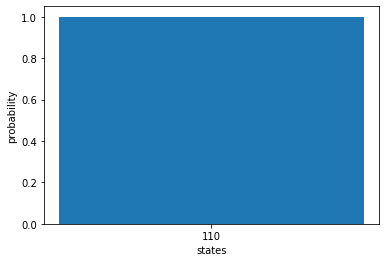

In [14]:
x=[]
y=[]
results = probs_last
for i in range(len(results)):
    if(np.linalg.norm(results[i])>0.01):
         x.append(np.binary_repr(i,3))
         y.append(results[i])
plt.bar(x,y);
plt.xlabel('states');
plt.ylabel('probability');
# plt.xticks(rotation=90);
plt.show()